In [1]:
import pandas as pd
import numpy as np
songs=pd.read_csv('SONGS 2.csv')

In [2]:
songs=songs.fillna('')

In [3]:
grp=songs.groupby('Key').Song.count()
grp

Key
       1
A     21
Ab    26
B     10
Bb    12
C     24
D     21
Db    20
E     30
Eb    14
F     26
Fs    14
G     20
Name: Song, dtype: int64

In [7]:
(songs!='').sum().sort_values().tail(20)

CEAF      5
FG        5
AFGE      6
CGF       6
FGA       6
AGCF      7
CGDF      7
AGF       7
AFC       8
DFCG     10
FCAG     10
CFAG     11
ACGF     11
CAFG     17
FCGA     29
CGAF     35
AFCG     68
Key     238
BPM     238
Song    239
dtype: int64

In [12]:
key='ACGF' 
songs[songs[key]!=''][['Song',key,'BPM','Key']].sort_values(by='BPM')

,Song,ACGF,BPM,Key
42,Centuries,134,88,G
69,Galway Girl,13,100,C
110,In the End,3,105,Eb
16,Angel in Blue Jeans,3,115,C
234,Wrecking Ball,12,120,E
47,Counting Stars,1234,122,F
205,Timber,3,130,C
97,I Fell In Love With TD,12,136,C
63,Everytime WT,1,142,Fs
86,Hello,1,158,Fs


In [5]:
dets=songs.columns.tolist()[:3]
progs=songs.columns.tolist()[3:]

In [6]:
def find_chords(x):
    return songs.iloc[x,:][songs.iloc[x,:]!=''].axes[0].tolist()[3:]

In [7]:
dicts={}
for i in range(0,len(songs)):
    title,BPM,key=songs[['Song','BPM','Key']].iloc[i]       
    chords=find_chords(i)
    dicts[title]={'BPM':BPM,'Key':key,'Chords':chords}

In [8]:
from tqdm import tqdm as tqdm
import numpy as np

In [9]:
titles=songs['Song'].tolist()
chords=songs.columns.tolist()[3:]

In [10]:
def rand(x):
    return np.random.randint(low=0,high=len(x),size=1)[0]

In [11]:
winning_progs=[]

In [70]:
chord_dict={}
for chord in chords:
    eligible_songs=songs['Song'][songs[chord]!=''].tolist()
    chord_dict[chord]=eligible_songs
song_progs=[]
for i in tqdm(range(10000000)):
    song_prog=[]
    chords_used=[]
    neatness=[]
    current_song=titles[rand(songs)]
    while True:
        cdict=chord_dict.copy()
        song_prog.append(current_song)
        chords_in_song=dicts[current_song]['Chords']
        chosen_chord=chords_in_song[rand(chords_in_song)]
        songs_in_chord=cdict[chosen_chord]
        current_bpm=dicts[current_song]['BPM']
        current_key=dicts[current_song]['Key']
        neatness.append([current_song,chosen_chord,current_bpm,current_key])
        try:
            songs_in_chord.remove(current_song)
            current_song=songs_in_chord[rand(songs_in_chord)]  
        except:
            break
    song_progs.append(neatness)
for i in sorted(song_progs,key=len,reverse=True)[0:20]:
    winning_progs.append(i )

100%|██████████| 10000000/10000000 [01:31<00:00, 108823.08it/s]


In [71]:
working_prog=pd.DataFrame(sorted(winning_progs,key=len,reverse=True)[0],columns=['Song','Chord','BPM','Key'])

In [19]:
sorted(winning_progs,key=len,reverse=True)[0]

NameError: name 'winning_progs' is not defined

In [84]:
working_prog.to_csv('working prog 2.csv')

In [60]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

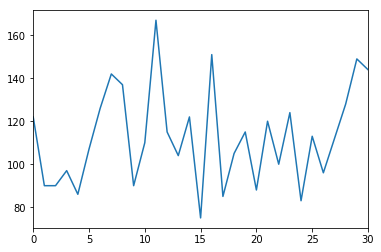

<Figure size 432x288 with 0 Axes>

In [61]:
working_prog['BPM'].plot()
plt.figure()

In [13]:
df=pd.DataFrame(dicts)

In [15]:
df=df.T

In [16]:
df['Link']=df['Chords'].apply(lambda x: True if len(x)>1 else False)

In [17]:
df[df['Link']==True]

,BPM,Chords,Key,Link
21 Guns,160,"[AFCG, AFCE]",F,True
50 Ways,140,"[FCGA, FG]",Fs,True
A Million Dreams,110,"[CGAF, CGDF, GAF]",G,True
A Team,85,"[AFC, DFCG]",A,True
Alive,100,"[CGAF, AGF, AGCF, AGFD]",A,True
All of Me,120,"[AFCG, CADG, DCGD]",Ab,True
All the Small Things,149,"[CGF, CGFG]",C,True
Amnesia,102,"[CGAF, AF, CF]",D,True
Angel in Blue Jeans,115,"[FCGA, ACGF, DFCG, GDFA]",C,True
Back to December,142,"[AFCG, AGCF, CEFG]",D,True


In [45]:
my_dict=songs.transpose().to_dict()

In [46]:
trans_songs=songs.transpose()

In [47]:
song_titles=trans_songs.columns.to_list()
dfs=[]
for title in song_titles:
    df_song=trans_songs[title]
    df_song=df_song.dropna()
    dfs.append(df_song)

In [74]:
prac=dfs[0].to_dict()
for key in list(prac.keys())[3:]:
    print(prac[key])

124.0
4.0
